In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [5]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  Region  
0  0.5        0       0  
1  0.4        0       0  
2  0.1        0       0  
3  0.0        0       0  
4  0.5        0       0

In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


In [15]:
df.drop(['day','year'], axis=1,inplace=True)

In [17]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [19]:
X.head()


month  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  Classes  \
0      6           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4        0   
1      6           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9        0   
2      6           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7        0   
3      6           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7        0   
4      6           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9        0   

   Region  
0       0  
1       0  
2       0  
3       0  
4       0

In [21]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
X_train.shape,X_test.shape


((182, 12), (61, 12))

In [25]:
X_train.corr()

month  Temperature        RH        Ws      Rain      FFMC  \
month        1.000000    -0.015272 -0.031036 -0.037508  0.008632 -0.006620   
Temperature -0.015272     1.000000 -0.656095 -0.305977 -0.317512  0.694768   
RH          -0.031036    -0.656095  1.000000  0.225736  0.241656 -0.653023   
Ws          -0.037508    -0.305977  0.225736  1.000000  0.251932 -0.190076   
Rain         0.008632    -0.317512  0.241656  0.251932  1.000000 -0.545491   
FFMC        -0.006620     0.694768 -0.653023 -0.190076 -0.545491  1.000000   
DMC          0.053308     0.498173 -0.414601  0.000379 -0.289754  0.620807   
DC           0.121493     0.390684 -0.236078  0.096576 -0.302341  0.524101   
ISI          0.076010     0.629848 -0.717804 -0.023558 -0.345707  0.750799   
BUI          0.074529     0.473609 -0.362317  0.035633 -0.300964  0.607210   
Classes      0.005476     0.542141 -0.456876 -0.082570 -0.369357  0.781259   
Region      -0.014930     0.254549 -0.394665 -0.199969 -0.059022  0.249514   

                  DMC        DC       ISI       BUI   Classes    Region  
month        0.053308  0.121493  0.076010  0.074529  0.005476 -0.014930  
Temperature  0.498173  0.390684  0.629848  0.473609  0.542141  0.254549  
RH          -0.414601 -0.236078 -0.717804 -0.362317 -0.456876 -0.394665  
Ws           0.000379  0.096576 -0.023558  0.035633 -0.082570 -0.199969  
Rain        -0.289754 -0.302341 -0.345707 -0.300964 -0.369357 -0.059022  
FFMC         0.620807  0.524101  0.750799  0.607210  0.781259  0.249514  
DMC          1.000000  0.868647  0.685656  0.983175  0.617273  0.212582  
DC           0.868647  1.000000  0.513701  0.942414  0.543581 -0.060838  
ISI          0.685656  0.513701  1.000000  0.643818  0.742977  0.296441  
BUI          0.983175  0.942414  0.643818  1.000000  0.612239  0.114897  
Classes      0.617273  0.543581  0.742977  0.612239  1.000000  0.188837  
Region       0.212582 -0.060838  0.296441  0.114897  0.188837  1.000000

<Axes: >

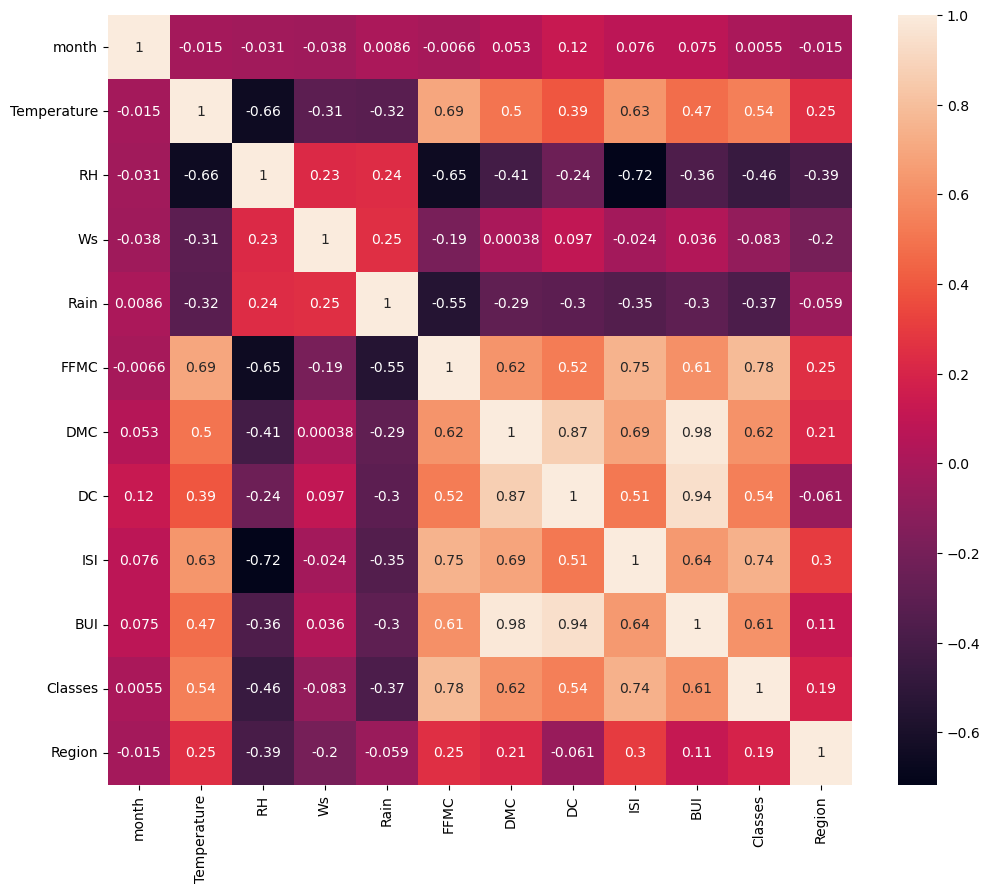

In [27]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [29]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [37]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

**Why**
The reason for deciding to drop the features with high correlation in the code you provided is to reduce multicollinearity. Multicollinearity occurs when two or more features (columns) in a dataset are highly correlated, meaning they provide similar information to the model. This can cause issues in certain models, particularly in linear regression and other parametric models. Here’s a detailed breakdown:

**Why Drop Highly Correlated Features?**
**Redundancy:** When two or more features are highly correlated, they convey very similar information. Including both features does not add much new information to the model but may increase computational complexity.

**Multicollinearity Issues:** Highly correlated features can cause problems with models like linear regression, which rely on the independence of input features. Multicollinearity can make it difficult for the model to estimate the relationship between the features and the target variable correctly, leading to:

**Unstable coefficients:** The model can assign incorrect importance to features because it’s confused about which feature is responsible for the prediction.

**Overfitting:** Including highly correlated features can lead to overfitting, where the model learns noise in the training data instead of general patterns.

**Model Interpretability:** When features are highly correlated, it can be difficult to interpret the model's output. By removing one of the correlated features, the model becomes more interpretable because the remaining features have a more direct relationship with the target variable.

In [39]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 10), (61, 10))

## Feature Scaling Or Standardization


In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Box Plots To understand Effect Of Standard Scaler


Text(0.5, 1.0, 'X_train After Scaling')

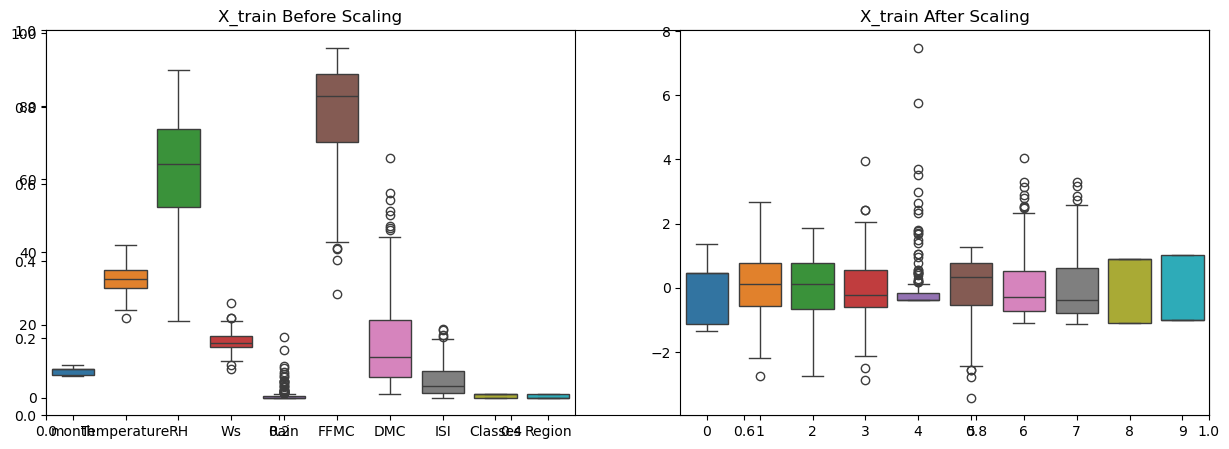

In [47]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)

y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5662065166333031
R2 Score 0.9842781874265488


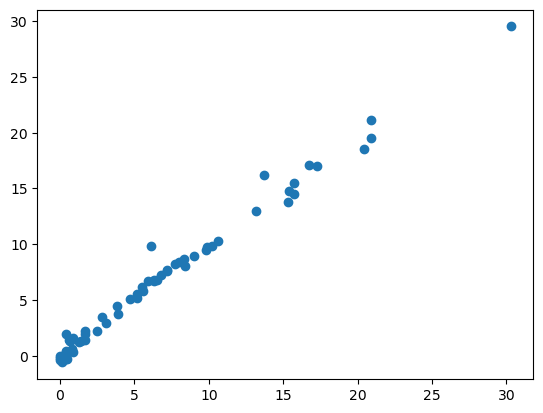

In [62]:
plt.scatter(y_test,y_pred)

## Lasso Regression


Mean absolute error 1.1331759949144085
R2 Score 0.9492020263112388


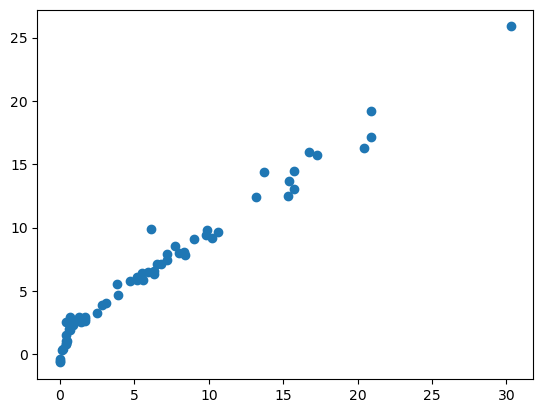

In [65]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso=Lasso()
lasso.fit(X_train_scaled,y_train)

y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Cross Validation Lasso


In [79]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)


LassoCV(cv=5)

In [81]:
lassocv.alpha_

0.05725391318234408

In [85]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [87]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mean absolute error 0.6290381186894701
R2 Score 0.9817622454942999


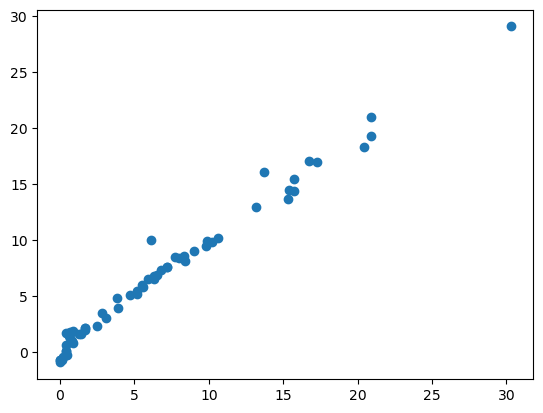

In [89]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

## Ridge Regression model


Mean absolute error 0.5795459271852444
R2 Score 0.9837092476935569


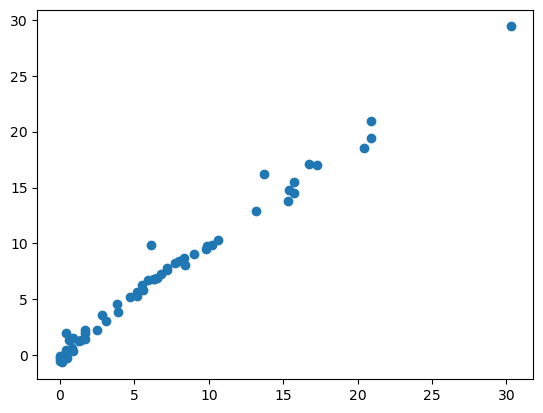

In [68]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge=Ridge()
ridge.fit(X_train_scaled,y_train)

y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.5795459271852444
R2 Score 0.9837092476935569


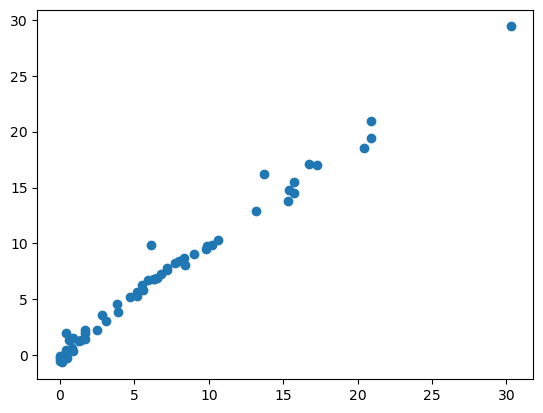

In [91]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

## Elasticnet Regression


Mean absolute error 1.8822352387195778
R2 Score 0.8753460815219092


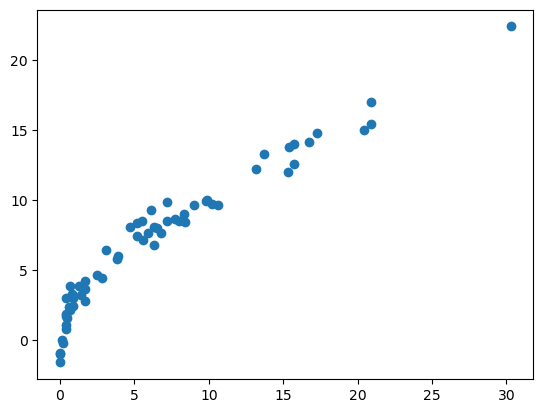

In [72]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)

y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.6656425440004982
R2 Score 0.9809202940458158


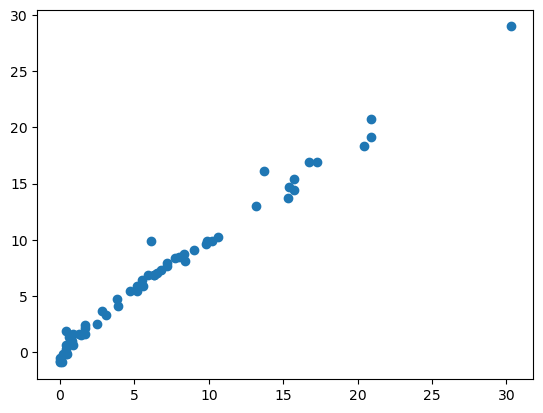

In [93]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [95]:
## Pickle the machine learning model, preprocessign model standardscaler
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))
